## <span style="color:#957DAD">Índice</span>

### Contenido
+ <a href="#PDB" style="color:#E18AAA"><b>Interacciones PDB</b></a>
    + <a href="#Puentes_disulfuro" style="color:#E18AAA">Encontrar posibles puentes disulfuro</a>
    + <a href="#Inter_residuos" style="color:#E18AAA">Encontrar posibles interacciones de residuos</a>
+ <a href="#ENTREZ" style="color:#E18AAA"><b>ENTREZ</b></a>
    + <a href="#EInfo" style="color:#E18AAA">EInfo</a>
    + <a href="#Esearch" style="color:#E18AAA">Esearch</a>
    + <a href="#EGQuery" style="color:#E18AAA">EGQuery</a>
    + <a href="#ESpell" style="color:#E18AAA">ESpell</a>
    + <a href="#ESummary" style="color:#E18AAA">ESummary</a>
    + <a href="#EPost" style="color:#E18AAA">EPost</a>
    + <a href="#Efetch" style="color:#E18AAA">Efetch</a>
    + <a href="#Elink" style="color:#E18AAA">Elink</a>

### Ejercicios
+ <a href="#Ejercicio_1" style="color:#058B8C">Ejercicio 1</a>
+ <a href="#Ejercicio_2" style="color:#058B8C">Ejercicio 2</a>
+ <a href="#Ejercicio_3" style="color:#058B8C">Ejercicio 3</a>
+ <a href="#Ejercicio_4" style="color:#058B8C">Ejercicio 4</a>



<p id="PDB"></p>

# <span style="color:#D291BC">Interacciones PDB</span>

<a id="Puentes_disulfuro"></a>

## <span style="color:#957DAD">Encontrar posibles puentes disulfuro</span>


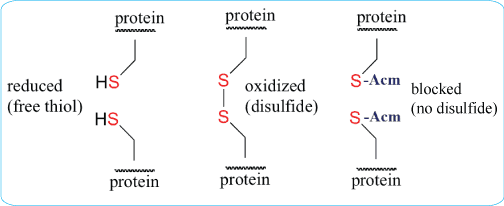

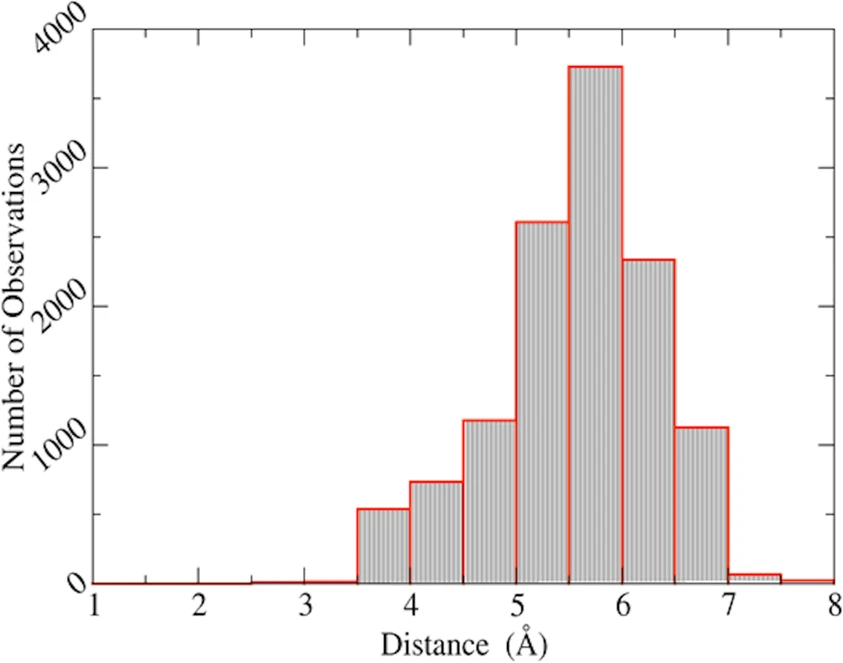

 As shown in Fig. 3, the distances between the Cα atoms for the disulfide bonded cysteines are mainly between 3.0 Å and 7.5 Å. Using this criterion (distance between Cα atom in the range of 3.0 Å and 7.5 Å),

https://www.nature.com/articles/s41598-020-67230-z#Fig3

In [49]:
%%bash
grep 'SSBOND' ./archivos_trabajo/1kcw.pdb

SSBOND   1 CYS A  155    CYS A  181                          1555   1555  2.00  
SSBOND   2 CYS A  257    CYS A  338                          1555   1555  2.03  
SSBOND   3 CYS A  515    CYS A  541                          1555   1555  2.02  
SSBOND   4 CYS A  618    CYS A  699                          1555   1555  2.03  
SSBOND   5 CYS A  855    CYS A  881                          1555   1555  2.02  


Inferencias computacionales 
The SSBOND record identifies each disulfide bond in protein and polypeptide structures by identifying the two residues involved in the bond.

The disulfide bond distance is included after the symmetry operations at the end of the SSBOND record.

In [239]:
import Bio.PDB.PDBParser
import sys

# Use QUIET=True to avoid lots of warnings...
parser = Bio.PDB.PDBParser(QUIET=True)
structure = parser.get_structure("1KCW", "./archivos_trabajo/1kcw.pdb")
model = structure[0]
achain = model['A']

cysresidues = []

#Voy por cada residuo hasta encontrar CYS
for residue in achain:
    if residue.get_resname() == 'CYS':
        cysresidues.append(residue)




In [36]:
%%bash
awk -v col=4 -v term="CYS" 'toupper($col)==toupper(term)' ./archivos_trabajo/1kcw.pdb | head -n 15

REMARK 620 2 CYS A 319   SG  117.7                                              
REMARK 620 2 CYS A 680   SG  142.8                                              
REMARK 620 2 CYS A1021   SG  131.1                                              
ATOM   1254  N   CYS A 155     129.764  20.485 -17.657  1.00 45.86           N  
ATOM   1255  CA  CYS A 155     130.480  19.677 -16.710  1.00 45.86           C  
ATOM   1256  C   CYS A 155     131.021  20.554 -15.578  1.00 45.86           C  
ATOM   1257  O   CYS A 155     131.869  21.407 -15.818  1.00 45.86           O  
ATOM   1258  CB  CYS A 155     131.647  19.028 -17.462  1.00 53.36           C  
ATOM   1259  SG  CYS A 155     131.693  17.210 -17.505  1.00 53.36           S  
ATOM   1450  N   CYS A 181     129.307  15.707 -15.814  1.00 28.55           N  
ATOM   1451  CA  CYS A 181     128.695  16.303 -16.988  1.00 28.55           C  
ATOM   1452  C   CYS A 181     127.215  16.035 -17.012  1.00 28.55           C  
ATOM   1453  O   CYS A 181  

In [41]:
for atom in cysresidues[0].get_atoms():
    print(atom.element, atom.id)

N N
C CA
C C
O O
C CB
S SG


In [241]:

# Veo todos los residuos y sus combinaciones. Como vimos anteriormente, al restar átomos nos da la distancia
for c1 in cysresidues:
    c1index = c1.get_id()[1]
    for c2 in cysresidues:
        c2index = c2.get_id()[1]
        #Estoy enteresada en el átomo de SG "sulfur-gamma"
        if (c1['SG'] - c2['SG']) < 8.0:
            print("possible di-sulfide bond:", end=" ")
            print("Cys",c1index,"-", end=" ")
            print("Cys",c2index, end=" ")
            print(round(c1['SG'] - c2['SG'],2))

possible di-sulfide bond: Cys 155 - Cys 155 0.0
possible di-sulfide bond: Cys 155 - Cys 181 2.0
possible di-sulfide bond: Cys 181 - Cys 155 2.0
possible di-sulfide bond: Cys 181 - Cys 181 0.0
possible di-sulfide bond: Cys 221 - Cys 221 0.0
possible di-sulfide bond: Cys 257 - Cys 257 0.0
possible di-sulfide bond: Cys 257 - Cys 338 2.03
possible di-sulfide bond: Cys 319 - Cys 319 0.0
possible di-sulfide bond: Cys 338 - Cys 257 2.03
possible di-sulfide bond: Cys 338 - Cys 338 0.0
possible di-sulfide bond: Cys 515 - Cys 515 0.0
possible di-sulfide bond: Cys 515 - Cys 541 2.02
possible di-sulfide bond: Cys 541 - Cys 515 2.02
possible di-sulfide bond: Cys 541 - Cys 541 0.0
possible di-sulfide bond: Cys 618 - Cys 618 0.0
possible di-sulfide bond: Cys 618 - Cys 699 2.03
possible di-sulfide bond: Cys 680 - Cys 680 0.0
possible di-sulfide bond: Cys 699 - Cys 618 2.03
possible di-sulfide bond: Cys 699 - Cys 699 0.0
possible di-sulfide bond: Cys 855 - Cys 855 0.0
possible di-sulfide bond: Cys 855 

<a id="Ejercicio_1"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 1</h2>
<p>Arreglar el código para que solo muestre las cominaciones únicas</p>


<h3 id="sample-output">Resultado emitido de muestra</h3>
<div class="codehilite"><pre>possible di-sulfide bond: Cys 155 - Cys 181 2.0
possible di-sulfide bond: Cys 257 - Cys 338 2.03
possible di-sulfide bond: Cys 515 - Cys 541 2.02
possible di-sulfide bond: Cys 618 - Cys 699 2.03
possible di-sulfide bond: Cys 881 - Cys 855 2.02

</pre></div>
</div>

¿por qué me interesa?

https://www.rcsb.org/3d-view/1KCW

<a id="Inter_residuos"></a>

## <span style="color:#957DAD">Encontrar posibles interacciones de residuos</span>


Dos copias de la misma proteína interactuando, ¿Qué residuos están cerca a los residuos del la cadena? ¿Cuáles son los residuos involucrados?

In [56]:
import Bio.PDB.PDBParser
import sys

# Use QUIET=True to avoid lots of warnings...
parser = Bio.PDB.PDBParser(QUIET=True)
structure = parser.get_structure("1HPV","./archivos_trabajo/1hpv.pdb")

achain = structure[0]['A']
bchain = structure[0]['B']

Todos los residuos tendrán diferentes tpos de átomos.
En lugar de buscar en todos los átomos de los residuos ¿qué tienen en común?

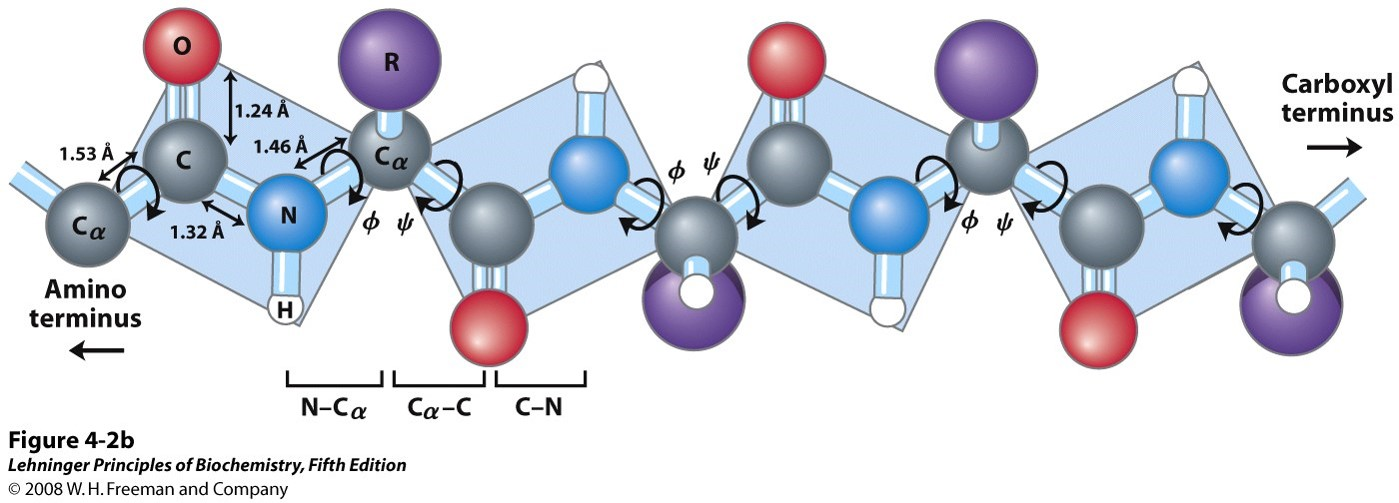

In [66]:
# Busco en el carbono alfa
for res1 in achain:
    r1ca = res1['CA']
    r1ind = res1.get_id()[1]
    r1sym = res1.get_resname()
    # Busco el carbono alfa de la otra cadena
    for res2 in bchain:
        r2ca = res2['CA']
        r2ind = res2.get_id()[1]
        r2sym = res2.get_resname()
        
        #Reviso las distancias
        if (r1ca - r2ca) < 6.0:
            print("Residues",r1sym,r1ind,"in chain A", end=" ")
            print("and",r2sym,r2ind,"in chain B", end=" ")
            print("are close to each other:",round(r1ca-r2ca,2))

Residues PRO 1 in chain A and ASN 98 in chain B are close to each other: 5.61
Residues PRO 1 in chain A and PHE 99 in chain B are close to each other: 5.25


KeyError: 'CA'

In [68]:
res2.id

('H_478', 200, ' ')

In [55]:
from Bio.PDB.Polypeptide import is_aa

In [65]:
# Busco en el carbono alfa
for res1 in achain:
    # Reviso que sea un aa
    if is_aa(res1):
        r1ca = res1['CA']
        r1ind = res1.get_id()[1]
        r1sym = res1.get_resname()
        # Busco el carbono alfa de la otra cadena
        for res2 in bchain:
            # Reviso que sea un aa
            if is_aa(res2):
                r2ca = res2['CA']
                r2ind = res2.get_id()[1]
                r2sym = res2.get_resname()

                #Reviso las distancias
                if (r1ca - r2ca) < 6.0:
                    print("Residues",r1sym,r1ind,"in chain A", end=" ")
                    print("and",r2sym,r2ind,"in chain B", end=" ")
                    print("are close to each other:",round(r1ca-r2ca,2))

Residues PRO 1 in chain A and ASN 98 in chain B are close to each other: 5.61
Residues PRO 1 in chain A and PHE 99 in chain B are close to each other: 5.25
Residues GLN 2 in chain A and LEU 97 in chain B are close to each other: 5.75
Residues GLN 2 in chain A and ASN 98 in chain B are close to each other: 4.6
Residues ILE 3 in chain A and THR 96 in chain B are close to each other: 5.62
Residues ILE 3 in chain A and LEU 97 in chain B are close to each other: 4.96
Residues THR 4 in chain A and THR 96 in chain B are close to each other: 4.89
Residues LEU 5 in chain A and THR 91 in chain B are close to each other: 5.87
Residues ASP 25 in chain A and THR 26 in chain B are close to each other: 5.2
Residues ASP 25 in chain A and GLY 27 in chain B are close to each other: 4.52
Residues THR 26 in chain A and ASP 25 in chain B are close to each other: 5.19
Residues THR 26 in chain A and THR 26 in chain B are close to each other: 5.51
Residues GLY 27 in chain A and ASP 25 in chain B are close to 

https://www.rcsb.org/3d-view/1HPV
### Residues PHE 99 in chain A and PRO 1 in chain B are close to each other: 5.25
hydrogen bonds in blue
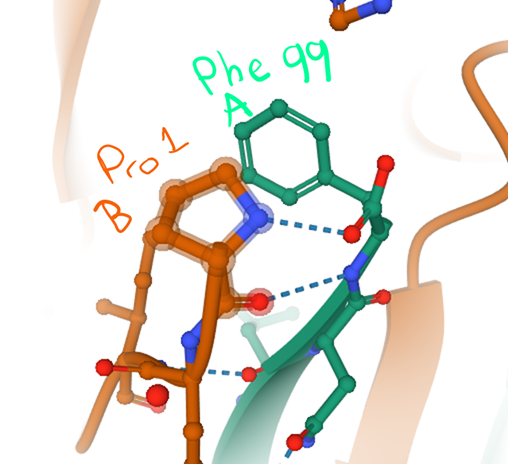

En lugar de buscar en toda la cadena B, busco todo lo que esté cerca del átomo en 6 Å

In [75]:
import Bio.PDB.PDBParser
import sys

from Bio.PDB.Polypeptide import is_aa

# Use QUIET=True to avoid lots of warnings...
parser = Bio.PDB.PDBParser(QUIET=True)
structure = parser.get_structure("1HPV","./archivos_trabajo/1hpv.pdb")

achain = structure[0]['A']
bchain = structure[0]['B']

bchainca = [ r['CA'] for r in bchain if is_aa(r)]
neighbors = Bio.PDB.NeighborSearch(bchainca)

for res1 in achain:
    if is_aa(res1):
        r1ca = res1['CA']
        r1ind = res1.get_id()[1]
        r1sym = res1.get_resname()
        for r2ca in neighbors.search(r1ca.get_coord(), 6.0):
            res2 = r2ca.get_parent()
            r2ind = res2.get_id()[1]
            r2sym = res2.get_resname()
            print("Residues",r1sym,r1ind,"in chain A", end=" ")
            print("and",r2sym,r2ind,"in chain B", end=" ")
            print("are close to each other:",round(r1ca-r2ca,2))


Residues PRO 1 in chain A and PHE 99 in chain B are close to each other: 5.25
Residues PRO 1 in chain A and ASN 98 in chain B are close to each other: 5.61
Residues GLN 2 in chain A and LEU 97 in chain B are close to each other: 5.75
Residues GLN 2 in chain A and ASN 98 in chain B are close to each other: 4.6
Residues ILE 3 in chain A and LEU 97 in chain B are close to each other: 4.96
Residues ILE 3 in chain A and THR 96 in chain B are close to each other: 5.62
Residues THR 4 in chain A and THR 96 in chain B are close to each other: 4.89
Residues LEU 5 in chain A and THR 91 in chain B are close to each other: 5.87
Residues ASP 25 in chain A and GLY 27 in chain B are close to each other: 4.52
Residues ASP 25 in chain A and THR 26 in chain B are close to each other: 5.2
Residues THR 26 in chain A and THR 26 in chain B are close to each other: 5.51
Residues THR 26 in chain A and ASP 25 in chain B are close to each other: 5.19
Residues GLY 27 in chain A and ASP 25 in chain B are close to 

<a id="Ejercicio_2"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 2</h2>
<p> BS3 es un  agente entrecruzante  impermeable a la membrana plasmática. Sirve para el estudio de
interacciones de proteínas de membrana plasmática con residuos de lisina
accesibles desde el medio extracelular</p>
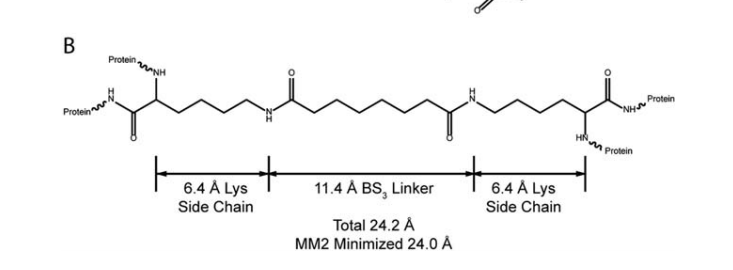

    
+ Encuentren los pares de lisinas que podrían ser unidas utilizando BS3 

La distancia suele ser menor a 12 Å

</pre></div>
</div>

<p id="ENTREZ"></p>

# <span style="color:#D291BC">ENTREZ</span>

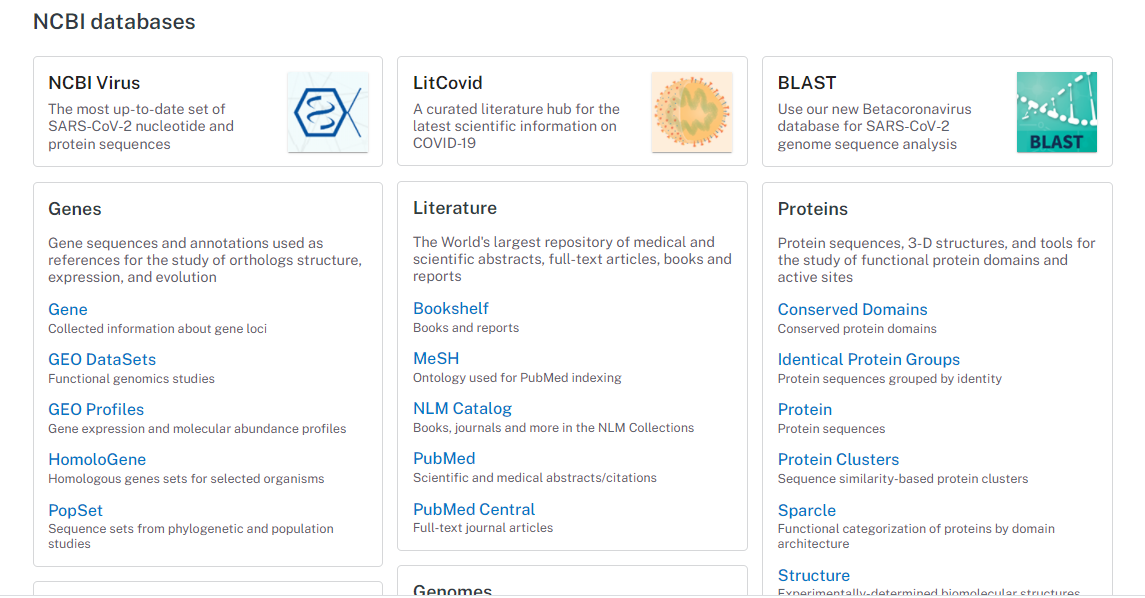

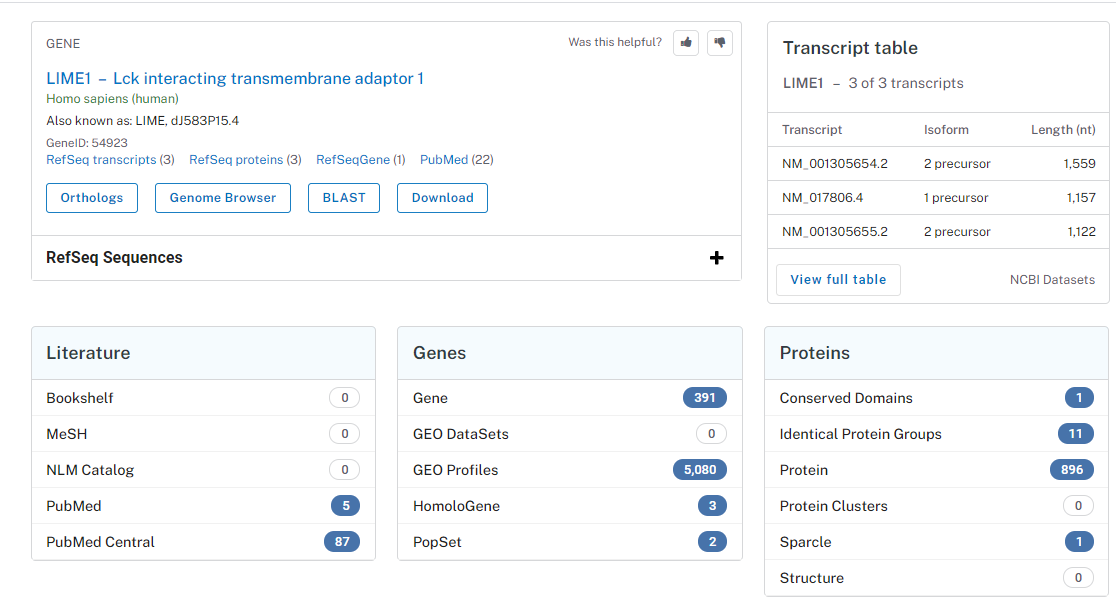

¿Qué pasa si quiero automatizar?

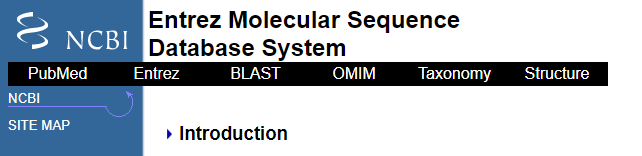

Functions:

+ <span style="color:#957DAD">**efetch**</span> Retrieves records in the requested format from a list of one or more primary IDs or from the user's environment  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch
    
    
+ <span style="color:#957DAD">**epost**</span> Posts a file containing a list of primary IDs for future use in the user's environment to use with subsequent search strategies  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EPost
    
    
+ <span style="color:#957DAD">**esearch**</span> Searches and retrieves primary IDs (for use in EFetch, ELink, and ESummary) and term translations and optionally retains results for future use in the user's environment.  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESearch
    
    
+ <span style="color:#957DAD">**elink**</span> Checks for the existence of an external or Related Articles link from a list of one or more primary IDs. Retrieves primary IDs and relevancy scores for links to Entrez databases or Related Articles; creates a hyperlink to the primary LinkOut provider for a specific ID and database, or lists LinkOut URLs and Attributes for multiple IDs.  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ELink


+ <span style="color:#957DAD">**einfo**</span> Provides field index term counts, last update, and available links for each database.  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EInfo


+ <span style="color:#957DAD">**esummary**</span> Retrieves document summaries from a list of primary IDs or from the user's environment.  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESummary
    
    
+ <span style="color:#957DAD">**egquery**</span> Provides Entrez database counts in XML for a single search using Global Query.
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EGQuery
    

+ <span style="color:#957DAD">**espell**</span> Retrieves spelling suggestions.  
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESpell
    

+ <span style="color:#957DAD">**ecitmatch**</span> Retrieves PubMed IDs (PMIDs) that correspond to a set of input citation strings.
   http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ECitMatch
   
   
+ <span style="color:#957DAD">**read**</span> Parses the XML results returned by any of the above functions. Typical usage is:  
```python
>>> from Bio import Entrez
>>> Entrez.email = "Your.Name.Here@example.org"
>>> handle = Entrez.einfo() # or esearch, efetch, ...
>>> record = Entrez.read(handle)
>>> handle.close()
```
where record is now a Python dictionary or list.

+ <span style="color:#957DAD">**parse**</span> Parses the XML results returned by those of the above functions which can return multiple records - such as efetch, esummary and elink. Typical usage is:

```python
>>> handle = Entrez.esummary(db="pubmed", id="19304878,14630660", retmode="xml")
>>> records = Entrez.parse(handle)
>>> for record in records:
...     # each record is a Python dictionary or list.
...     print(record['Title'])
Biopython: freely available Python tools for computational molecular biology and bioinformatics.
PDB file parser and structure class implemented in Python.
>>> handle.close()
```

This function is appropriate only if the XML file contains multiple records, and is particular useful for large files.

+ <span style="color:#957DAD">**_open**</span> Internally used function.


# Reglas
+ máximo 100 requests al día
+ dar un correo ( para que puedan contactarte por si estás usando demasiado el servidor)

Frequency, Timing and Registration of E-utility URL Requests
In order not to overload the E-utility servers, NCBI recommends that users post no more than three URL requests per second and limit large jobs to either weekends or between 9:00 PM and 5:00 AM Eastern time during weekdays. Failure to comply with this policy may result in an IP address being blocked from accessing NCBI. If NCBI blocks an IP address, service will not be restored unless the developers of the software accessing the E-utilities register values of the tool and email parameters with NCBI. The value of tool should be a string with no internal spaces that uniquely identifies the software producing the request. The value of email should be a complete and valid e-mail address of the software developer and not that of a third-party end user. The value of email will be used only to contact developers if NCBI observes requests that violate our policies, and we will attempt such contact prior to blocking access. In addition, developers may request that the value of email be added to the E-utility mailing list that provides announcements of software updates, known bugs and other policy changes affecting the E-utilities. To register tool and email values, simply send an e-mail to vog.hin.mln.ibcn@seitilitue including the desired values along with the name of either a developer or the organization creating the software. Once NCBI establishes communication with a developer, receives values for tool and email and validates the e-mail address in email, the block will be lifted. Once tool and email values are registered, all subsequent E-utility requests from that software package should contain both values. Please be aware that merely providing values for tool and email in requests is not sufficient to comply with this policy; these values must be registered with NCBI. Requests from any IP that lack registered values for tool and email and that violate the above usage policies may be blocked. Software developers may register values of tool and email at any time, and are encouraged to do so.

<a id="Einfo"></a>

## <span style="color:#957DAD">EInfo</span>


https://eutils.ncbi.nlm.nih.gov/entrez/eutils/einfo.fcgi



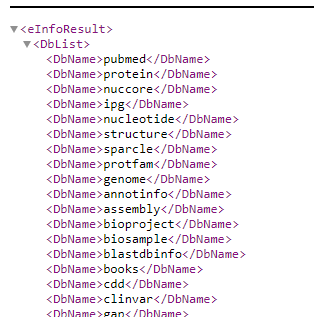

In [77]:
from Bio import Entrez 


In [89]:
Entrez.email = "emarquez@lcg.unam.mx" # Siempre avisar un correo
handle = Entrez.einfo() 
result = handle.read() 
handle.close() 

In [90]:
print(result)

b'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eInfoResult PUBLIC "-//NLM//DTD einfo 20190110//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20190110/einfo.dtd">\n<eInfoResult>\n<DbList>\n\n\t<DbName>pubmed</DbName>\n\t<DbName>protein</DbName>\n\t<DbName>nuccore</DbName>\n\t<DbName>ipg</DbName>\n\t<DbName>nucleotide</DbName>\n\t<DbName>structure</DbName>\n\t<DbName>sparcle</DbName>\n\t<DbName>protfam</DbName>\n\t<DbName>genome</DbName>\n\t<DbName>annotinfo</DbName>\n\t<DbName>assembly</DbName>\n\t<DbName>bioproject</DbName>\n\t<DbName>biosample</DbName>\n\t<DbName>blastdbinfo</DbName>\n\t<DbName>books</DbName>\n\t<DbName>cdd</DbName>\n\t<DbName>clinvar</DbName>\n\t<DbName>gap</DbName>\n\t<DbName>gapplus</DbName>\n\t<DbName>grasp</DbName>\n\t<DbName>dbvar</DbName>\n\t<DbName>gene</DbName>\n\t<DbName>gds</DbName>\n\t<DbName>geoprofiles</DbName>\n\t<DbName>homologene</DbName>\n\t<DbName>medgen</DbName>\n\t<DbName>mesh</DbName>\n\t<DbName>ncbisearch</DbName>\n\t<DbName>nlmcatalog</

In [91]:
a = str(result).replace('\\n','\n')
a = a.replace('\\t','\t')
print(a)

b'<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eInfoResult PUBLIC "-//NLM//DTD einfo 20190110//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20190110/einfo.dtd">
<eInfoResult>
<DbList>

	<DbName>pubmed</DbName>
	<DbName>protein</DbName>
	<DbName>nuccore</DbName>
	<DbName>ipg</DbName>
	<DbName>nucleotide</DbName>
	<DbName>structure</DbName>
	<DbName>sparcle</DbName>
	<DbName>protfam</DbName>
	<DbName>genome</DbName>
	<DbName>annotinfo</DbName>
	<DbName>assembly</DbName>
	<DbName>bioproject</DbName>
	<DbName>biosample</DbName>
	<DbName>blastdbinfo</DbName>
	<DbName>books</DbName>
	<DbName>cdd</DbName>
	<DbName>clinvar</DbName>
	<DbName>gap</DbName>
	<DbName>gapplus</DbName>
	<DbName>grasp</DbName>
	<DbName>dbvar</DbName>
	<DbName>gene</DbName>
	<DbName>gds</DbName>
	<DbName>geoprofiles</DbName>
	<DbName>homologene</DbName>
	<DbName>medgen</DbName>
	<DbName>mesh</DbName>
	<DbName>ncbisearch</DbName>
	<DbName>nlmcatalog</DbName>
	<DbName>omim</DbName>
	<DbName>orgtrack</DbName>
	<Db

+ ### <span style="color:#83B1C9">read</span>


Usamos el *parser* de <span style="color:#957DAD">**Bio.Entrez**</span> ( Entrez.read() ) para obtener un diccionario con una llave (DbList) cuyo valor es una lista de las bases de datos, en lugar de un XML


In [80]:
handle = Entrez.einfo() 
record = Entrez.read(handle) 
record

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'sparcle', 'protfam', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'biosystems', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}

Podemos obtener información de cada base datos usando <span style="color:#957DAD">**EInfo**</span>

Agregamos db=pubmed  
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/einfo.fcgi?db=pubmed

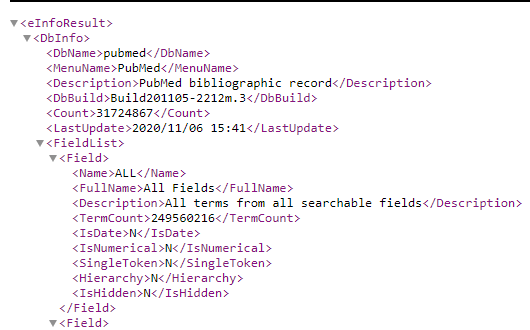

In [81]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)
record["DbInfo"]["Description"]

'PubMed bibliographic record'

In [109]:
handle.url

'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/einfo.fcgi?tool=biopython&email=asilemarq%40gmail.com'

In [82]:
record["DbInfo"]["Count"]

'31724867'

In [83]:
record["DbInfo"]["LastUpdate"]

'2020/11/06 15:41'

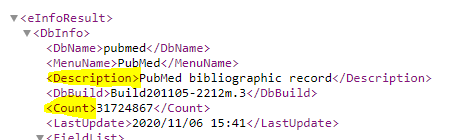

In [92]:
record["DbInfo"].keys()

dict_keys(['DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'])

In [93]:
 for field in record["DbInfo"]["FieldList"]:
        print("%(Name)s, %(FullName)s, %(Description)s" % field) 

ALL, All Fields, All terms from all searchable fields
UID, UID, Unique number assigned to publication
FILT, Filter, Limits the records
TITL, Title, Words in title of publication
WORD, Text Word, Free text associated with publication
MESH, MeSH Terms, Medical Subject Headings assigned to publication
MAJR, MeSH Major Topic, MeSH terms of major importance to publication
AUTH, Author, Author(s) of publication
JOUR, Journal, Journal abbreviation of publication
AFFL, Affiliation, Author's institutional affiliation and address
ECNO, EC/RN Number, EC number for enzyme or CAS registry number
SUBS, Supplementary Concept, CAS chemical name or MEDLINE Substance Name
PDAT, Date - Publication, Date of publication
EDAT, Date - Entrez, Date publication first accessible through Entrez
VOL, Volume, Volume number of publication
PAGE, Pagination, Page number(s) of publication
PTYP, Publication Type, Type of publication (e.g., review)
LANG, Language, Language of publication
ISS, Issue, Issue number of publ


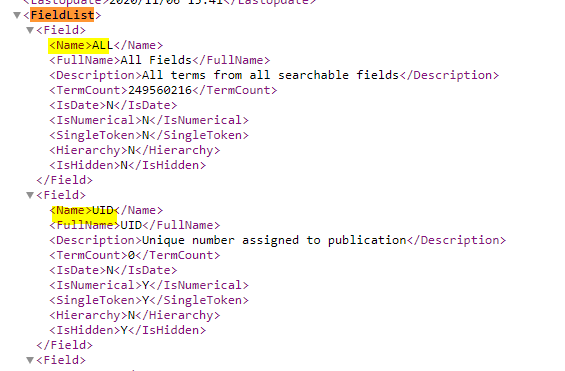

That’s a long list, but indirectly this tells you that for the PubMed database, you can do things like Jones[AUTH] to search the author ﬁeld, or Sanger[AFFL] to restrict to authors at the Sanger Centre. This can be very handy - especially if you are not so familiar with a particular database.


Entonces, ¿qué significa un 'pubmed_pmc' de mi LinkList en pubmed?

In [107]:
for link in record["DbInfo"]["LinkList"]:
    if link['Name'] =='pubmed_pmc':
        print (link['Description'])

Free full text articles in PMC


<a id="Ejercicio_3"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 3</h2>
<p>Utilizando Entrez.einfo y Entrez.read, imprime la descripción de:
    
    
+ field **'ECNO'**
+ link **'protein_protein_small_genome'**
    
    
de la base de datos 'protein'</p>

</div>

<a id="Esearch"></a>

## <span style="color:#957DAD">Esearch</span>


https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=biopython

In [176]:
from Bio import Entrez 
Entrez.email = "emarquez@lcg.unam.mx" # Always tell NCBI who you are 
handle = Entrez.esearch(db="pubmed", term="biopython") 
record = Entrez.read(handle) 
record["Count"] 


'28'

In [177]:
handle.url

'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=biopython&tool=biopython&email=emarquez%40lcg.unam.mx'

In [178]:
record["IdList"]

['32044951', '31762715', '31278684', '31069053', '30013827', '29641230', '28011774', '24929426', '24497503', '24267035', '24194598', '23842806', '23157543', '22909249', '22399473', '21666252', '21210977', '20015970', '19811691', '19773334']

https://pubmed.ncbi.nlm.nih.gov/?term=biopython

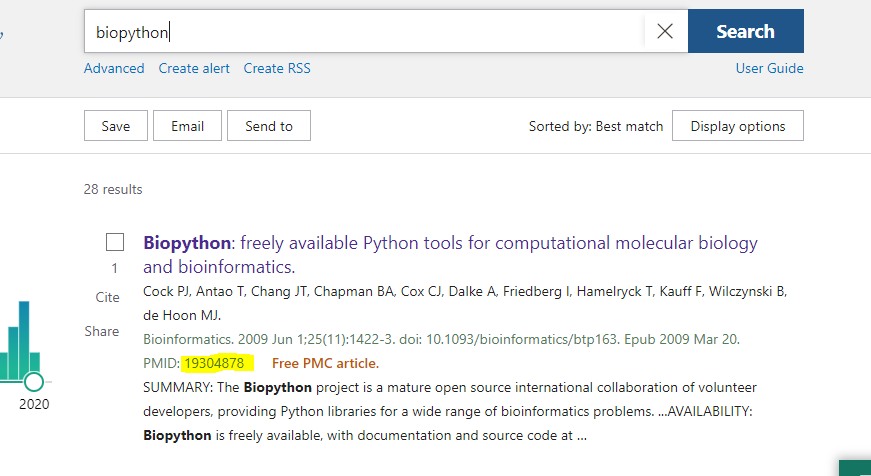

In [179]:
'19304878' in record["IdList"]

False

In [171]:
# TIENE UN MAXIMO DE 20 
len(record["IdList"])

20

In [242]:
from Bio import Entrez
import time

handle = Entrez.esearch(db="pubmed", term="biopython")
record = Entrez.read(handle)

count = int(record['Count'])
handle = Entrez.esearch(db="pubmed", term="biopython", retmax=count)
record = Entrez.read(handle)

In [243]:
record['IdList']

['32044951', '31762715', '31278684', '31069053', '30013827', '29641230', '28011774', '24929426', '24497503', '24267035', '24194598', '23842806', '23157543', '22909249', '22399473', '21666252', '21210977', '20015970', '19811691', '19773334', '19304878', '18606172', '21585724', '16403221', '16377612', '14871861', '14630660', '12230038']

In [244]:
len(record["IdList"])

28

In [245]:
'19304878' in record["IdList"]

True

In [183]:
record.keys()

dict_keys(['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation'])

### ¿Y si quiero buscar en algún field?

In [187]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)

In [191]:
for field in record["DbInfo"]["FieldList"]:
     print("%(Name)s\n, %(FullName)s\n, %(Description)s\n\n" % field) 


ALL
, All Fields
, All terms from all searchable fields


UID
, UID
, Unique number assigned to publication


FILT
, Filter
, Limits the records


TITL
, Title
, Words in title of publication


WORD
, Text Word
, Free text associated with publication


MESH
, MeSH Terms
, Medical Subject Headings assigned to publication


MAJR
, MeSH Major Topic
, MeSH terms of major importance to publication


AUTH
, Author
, Author(s) of publication


JOUR
, Journal
, Journal abbreviation of publication


AFFL
, Affiliation
, Author's institutional affiliation and address


ECNO
, EC/RN Number
, EC number for enzyme or CAS registry number


SUBS
, Supplementary Concept
, CAS chemical name or MEDLINE Substance Name


PDAT
, Date - Publication
, Date of publication


EDAT
, Date - Entrez
, Date publication first accessible through Entrez


VOL
, Volume
, Volume number of publication


PAGE
, Pagination
, Page number(s) of publication


PTYP
, Publication Type
, Type of publication (e.g., review)


LANG

------------------------

Se usa el field full name o el name

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=+Citlali+Gil-Aguill%C3%B3n+AND+Valeria+Mateo-Estrada&field=AUTH

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=biopython[title]

In [114]:
handle = Entrez.esearch(db="pubmed", term=' Citlali Gil-Aguillón AND Valeria Mateo-Estrada',field='AUTH')
record = Entrez.read(handle)

In [115]:
handle.url

'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=+Citlali+Gil-Aguill%C3%B3n+AND+Valeria+Mateo-Estrada&field=AUTH&tool=biopython&email=emarquez%40lcg.unam.mx'

In [228]:
record['IdList']

['30625167']

https://pubmed.ncbi.nlm.nih.gov/30625167/

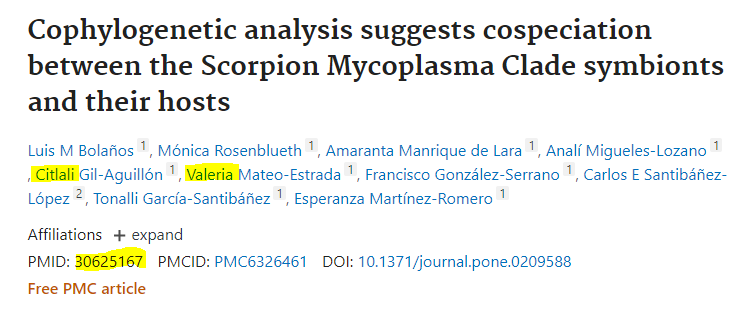

In [247]:
handle = Entrez.esearch(db="pubmed", term="De Miguel MP.",field='Author - Last',retmax=count)
record = Entrez.read(handle)

In [248]:
record['IdList']

['31751429', '30772348', '28757909', '28501004', '25730319', '25625506', '25226357', '25219779', '24910285', '24713343', '24675581', '24012888', '24008847', '21707703', '20188029', '18065394', '17543086', '17001157', '14694520', '14550410', '10332729', '9972804']

In [249]:
len(record['IdList'])

22

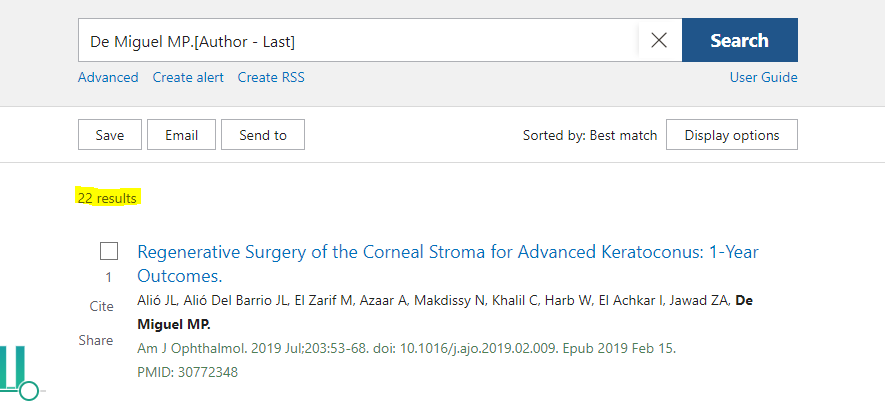

O combinar información

In [117]:
handle = Entrez.esearch(db="nucleotide", term="Cypripedioideae[Orgn] AND matK[Gene]")
result = Entrez.read(handle)
print(result["Count"])
print(result["IdList"])

549
['1919569438', '1919569357', '1914799245', '1914799158', '1914798725', '1905314954', '1905314873', '1897206781', '1884620328', '1677623889', '1811916441', '1783490533', '1783490455', '1783498964', '1778215405', '1775787012', '1775786929', '1251949175', '1251949173', '1251949171']


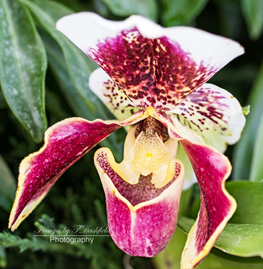

<a id="EGQuery"></a>

## <span style="color:#957DAD">EGQuery</span>


Nos muestra en qué bases de datos podemos encontrar información de nuestra búsqueda

In [109]:
# from Bio import Entrez 
# Entrez.email = "emarquez@lcg.unam.mx" 
handle = Entrez.egquery(term="biopython")
record = Entrez.read(handle)
for row in record["eGQueryResult"]:
    print(row["DbName"], row["Count"])

pubmed 28
pmc 1689
mesh 0
books 2
pubmedhealth Error
omim 0
ncbisearch 1
nuccore 0
nucgss 0
nucest 0
protein 0
genome 0
structure 0
taxonomy 0
snp 0
dbvar 0
gene 0
sra 0
biosystems 0
unigene Error
cdd 0
clone Error
popset 0
geoprofiles 0
gds 17
homologene 0
pccompound 0
pcsubstance 0
pcassay 0
nlmcatalog 0
probe 0
gap 0
proteinclusters 0
bioproject 1
biosample 0
biocollections 0


<a id="ESpell"></a>

## <span style="color:#957DAD">ESpell</span>


Nos ayuda a corregir la búsqueda con sugerencias de ortografía

In [110]:
handle = Entrez.espell(term="biopythooon")
record = Entrez.read(handle)
record["Query"]

'biopythooon'

In [111]:
record["CorrectedQuery"]


'biopython'

<a id="ESummary"></a>

## <span style="color:#957DAD">ESummary</span>



In [90]:
from Bio import Entrez 
Entrez.email = "emarquez@lcg.unam.mx"

In [92]:

handle = Entrez.esummary(db="taxonomy", id="9913,30521")
record = Entrez.read(handle)


In [93]:
len(record)

2

In [94]:
record[0].keys()

dict_keys(['Item', 'Id', 'Status', 'Rank', 'Division', 'ScientificName', 'CommonName', 'TaxId', 'AkaTaxId', 'Genus', 'Species', 'Subsp', 'ModificationDate'])

In [95]:
record[0]['Id']

'9913'

<a id="EPost"></a>

## <span style="color:#957DAD">EPost</span>


Si queremos buscar muchos ids, la liga podría hacerse muy larga y "romperse" 

In [87]:
# from Bio import Entrez
# Entrez.email = "emarquez@lcg.unam.mx"    
id_list = ["19304878", "18606172", "16403221", "16377612", "14871861", "14630660"]
print(Entrez.epost("pubmed", id=",".join(id_list)).read())

b'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE ePostResult PUBLIC "-//NLM//DTD epost 20090526//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20090526/epost.dtd"><ePostResult>\n\t<QueryKey>1</QueryKey>\n\t<WebEnv>MCID_5fa9c76568dbfd09e332a5c3</WebEnv>\n</ePostResult>\n'


In [88]:
id_list = ["19304878", "18606172", "16403221", "16377612", "14871861", "14630660"]
search_results = Entrez.read(Entrez.epost("pubmed", id=",".join(id_list)))
webenv = search_results["WebEnv"]
query_key = search_results["QueryKey"]

In [120]:
# # from Bio import Entrez
# # Entrez.email = "emarquez@lcg.unam.mx"
# pmid = "15718680,157427902"
# record = Entrez.read(Entrez.elink(dbfrom="protein", id=pmid ,db='gene'))
# print(record[0].keys())
# print('The record is from the {} database.'.format(record[0]["DbFrom"]))
# print('The IdList is {}.'.format(record[0]["IdList"]))

In [ ]:
# record[0]['']

<a id="Efetch"></a>

## <span style="color:#957DAD">Efetch</span>


This parameter specifies the data format of the records returned, such as plain text, HMTL or XML.

https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly

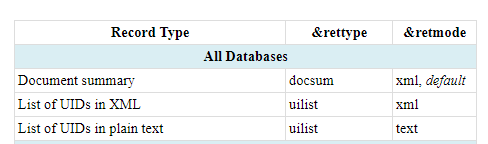

Me interesa nucleotide, pero no lo encuentro

https://www.ncbi.nlm.nih.gov/books/NBK25497/table/chapter2.T._entrez_unique_identifiers_ui/?report=objectonly

<!---# handle = Entrez.einfo(db="nucleotide")
# record = Entrez.read(handle)
# record["DbInfo"]["DbName"] </l> --->


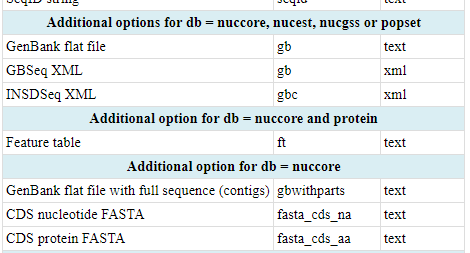

In [13]:
from Bio import Entrez, SeqIO
handle = Entrez.efetch(db="nucleotide", id="HE805982", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

# The sequence record is now stored in the variable `record` and
# we can print it to see what it contains 
print(record)

ID: HE805982.1
Name: HE805982
Description: Hepatitis B virus partial X gene for HBx, isolate 11851
Number of features: 3
/molecule_type=DNA
/topology=linear
/data_file_division=VRL
/date=15-MAY-2012
/accessions=['HE805982']
/sequence_version=1
/keywords=['']
/source=Hepatitis B virus
/organism=Hepatitis B virus
/taxonomy=['Viruses', 'Riboviria', 'Pararnavirae', 'Artverviricota', 'Revtraviricetes', 'Blubervirales', 'Hepadnaviridae', 'Orthohepadnavirus']
/references=[Reference(title='Mutation profiling of Hepatitis B virus strains circulating in India', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGCTGCTAGGTTGTACTGCCAACTGGATTCTTCGCGGGACGTCCTTTGTTTA...GTA')


In [14]:
print("- ID of the record:")
print(record.id)

print("\n- Brief description of the record:")
print(record.description)

print("\n- Annotations that come with the record (given as a python dictionary):")
print(record.annotations)

print("\n- The sequence in this record:")
print(record.seq)

- ID of the record:
HE805982.1

- Brief description of the record:
Hepatitis B virus partial X gene for HBx, isolate 11851

- Annotations that come with the record (given as a python dictionary):
{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'VRL', 'date': '15-MAY-2012', 'accessions': ['HE805982'], 'sequence_version': 1, 'keywords': [''], 'source': 'Hepatitis B virus', 'organism': 'Hepatitis B virus', 'taxonomy': ['Viruses', 'Riboviria', 'Pararnavirae', 'Artverviricota', 'Revtraviricetes', 'Blubervirales', 'Hepadnaviridae', 'Orthohepadnavirus'], 'references': [Reference(title='Mutation profiling of Hepatitis B virus strains circulating in India', ...), Reference(title='Direct Submission', ...)]}

- The sequence in this record:
ATGGCTGCTAGGTTGTACTGCCAACTGGATTCTTCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCCGCGGACGACCCCTCGCGAGGCCGCTTGGGGCTGTATCGTCCCCTTCTCCGTCTGCCGTACCGTCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTNGCCGGTCCGTGTGCACTTCGCTTCACCTCTGCACGTTGCATGGA

In [15]:
DNA_seq = record.seq

# translate into a protein sequence
protein_seq = DNA_seq.translate()
print(protein_seq)

MAARLYCQLDSSRDVLCLRPVGAESRGRPLARPLGAVSSPSPSAVPSDHGAHLSLRGLPVCAFSSXRSVCTSLHLCTLHGDHRERPSXPAQGLTKEDSWTLSNVNDRPRGLLQRLCDKRLGGVGGGDKVXXLCIRRL


C:\Users\Eli\Anaconda3\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [58]:
filename = "HE805982.gb"
with Entrez.efetch(db="nucleotide",id="HE805982",rettype="gb", retmode="text") as file:
    with open(filename, "w") as handle:
        handle.write(file.read())

record = SeqIO.read("HE805982.gb", "genbank")
print(record)

ID: HE805982.1
Name: HE805982
Description: Hepatitis B virus partial X gene for HBx, isolate 11851
Number of features: 3
/molecule_type=DNA
/topology=linear
/data_file_division=VRL
/date=15-MAY-2012
/accessions=['HE805982']
/sequence_version=1
/keywords=['']
/source=Hepatitis B virus
/organism=Hepatitis B virus
/taxonomy=['Viruses', 'Riboviria', 'Pararnavirae', 'Artverviricota', 'Revtraviricetes', 'Blubervirales', 'Hepadnaviridae', 'Orthohepadnavirus']
/references=[Reference(title='Mutation profiling of Hepatitis B virus strains circulating in India', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGCTGCTAGGTTGTACTGCCAACTGGATTCTTCGCGGGACGTCCTTTGTTTA...GTA')


### Búsqueda de linajes

También podemos obtener este tipo de datos haciendo algo como 

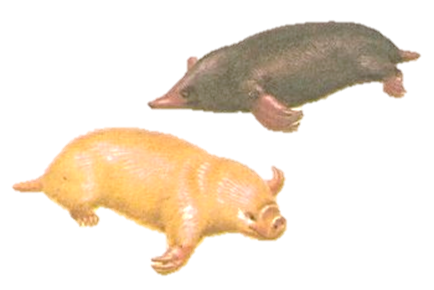

Notoryctes typhlops y Chrysochloris asiatica

In [122]:
# from Bio import Entrez
# Entrez.email = "emarquez@lcg.unam.mx"     
handle = Entrez.esearch(db="Taxonomy", term="Notoryctes typhlops")
record = Entrez.read(handle)
record["IdList"]

['37699']

In [123]:
id_tax = record["IdList"][0]


In [124]:
handle = Entrez.efetch(db="Taxonomy", id=id_tax, retmode="xml")
records = Entrez.read(handle)

In [125]:
records[0].keys()


dict_keys(['TaxId', 'ScientificName', 'OtherNames', 'ParentTaxId', 'Rank', 'Division', 'GeneticCode', 'MitoGeneticCode', 'Lineage', 'LineageEx', 'CreateDate', 'UpdateDate', 'PubDate'])

In [126]:
records[0]["ScientificName"]

'Notoryctes typhlops'

In [127]:
records[0]["OtherNames"]

{'Acronym': [], 'Anamorph': [], 'GenbankSynonym': [], 'Teleomorph': [], 'EquivalentName': [], 'Name': [], 'Misnomer': [], 'GenbankAnamorph': [], 'Misspelling': [], 'CommonName': [], 'Includes': [], 'Synonym': [], 'Inpart': [], 'GenbankCommonName': 'marsupial mole'}

### Topo 1

In [73]:
records[0]["Lineage"]


'cellular organisms; Eukaryota; Opisthokonta; Metazoa; Eumetazoa; Bilateria; Deuterostomia; Chordata; Craniata; Vertebrata; Gnathostomata; Teleostomi; Euteleostomi; Sarcopterygii; Dipnotetrapodomorpha; Tetrapoda; Amniota; Mammalia; Theria; Metatheria; Notoryctemorphia; Notoryctidae; Notoryctes'

### Topo 2

In [129]:
# from Bio import Entrez
# Entrez.email = "emarquez@lcg.unam.mx"     
handle = Entrez.esearch(db="Taxonomy", term="Chrysochloris asiatica")
record = Entrez.read(handle)
id_tax = record["IdList"][0]
handle = Entrez.efetch(db="Taxonomy", id=id_tax, retmode="xml")
records = Entrez.read(handle)
print(records[0]["OtherNames"])
print(records[0]["Lineage"])


{'Acronym': [], 'Anamorph': [], 'GenbankSynonym': [], 'Teleomorph': [], 'EquivalentName': [], 'Name': [{'ClassCDE': 'authority', 'DispName': 'Chrysochloris asiatica (Linnaeus, 1758)'}], 'Misnomer': [], 'GenbankAnamorph': [], 'Misspelling': [], 'CommonName': [], 'Includes': [], 'Synonym': [], 'Inpart': [], 'GenbankCommonName': 'Cape golden mole'}
cellular organisms; Eukaryota; Opisthokonta; Metazoa; Eumetazoa; Bilateria; Deuterostomia; Chordata; Craniata; Vertebrata; Gnathostomata; Teleostomi; Euteleostomi; Sarcopterygii; Dipnotetrapodomorpha; Tetrapoda; Amniota; Mammalia; Theria; Eutheria; Afrotheria; Chrysochloridae; Chrysochlorinae; Chrysochloris




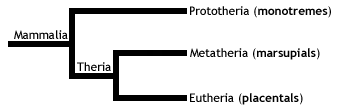

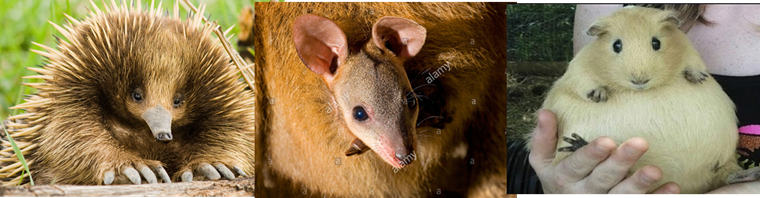

<a id="history_and_WebEnv"></a>

## <span style="color:#957DAD">history and WebEnv</span>


Suppose we want to search and download all the Opuntia rpl16 nucleotide sequences, and store them in a FASTA file. As shown in Section [sec:entrez-search-fetch-genbank], we can naively combine Bio.Entrez.esearch() to get a list of GI numbers, and then call Bio.Entrez.efetch() to download them all.

However, the approved approach is to run the search with the history feature. Then, we can fetch the results by reference to the search results - which the NCBI can anticipate and cache.



In [37]:
# from Bio import Entrez
# Entrez.email = "emarquez@lcg.unam.mx"
search_handle = Entrez.esearch(db="nucleotide",term="Opuntia ficus-indica[orgn] AND PsBA", usehistory="y")
search_results = Entrez.read(search_handle)
search_handle.close()

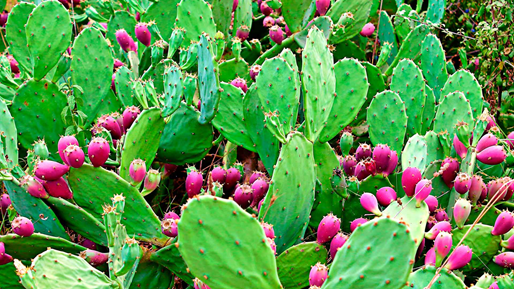

In [52]:
count =int(search_results["Count"])

In [41]:
print("The WebEnv is {}".format(search_results["WebEnv"]))
print("The QueryKey is {}".format(search_results["QueryKey"]))

The WebEnv is MCID_5fa9b0af332ded02b0457a98
The QueryKey is 1


In [42]:
webenv = search_results["WebEnv"]
query_key = search_results["QueryKey"]

Ahora tenemos "WebEnv" y "QueryKey", los cuales podemos usar en lugar de la lista de IDs 

Se recomienda descargar por lotes si tienes muchos archivos ya que puede llegar  a haber errores al conectar con Entrez y en ese caso solo hay que decirle que repita ese pequeño fragmento de búsqueda

In [53]:

from Bio import Entrez
import time
from urllib.error import HTTPError 

# número de lotes
batch_size = 3

#archivoo de salida
out_handle = open("op_atpB.fasta", "w")

for start in range(0, count, batch_size):
    end = min(count, start+batch_size)
    print("Going to download record %i to %i" % (start+1, end))
    attempt = 1
    while attempt <= 3:
        try:
            fetch_handle = Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text",
                                         retstart=start, retmax=batch_size,
                                         webenv=webenv, query_key=query_key)
            
            break
        except HTTPError as err:
            if 500 <= err.code <= 599:
                print("Received error from server %s" % err)
                print("Attempt %i of 3" % attempt)
                attempt += 1
                time.sleep(15)
            else:
                raise
                
    data = fetch_handle.read()
    fetch_handle.close()
    out_handle.write(data)
out_handle.close()

Going to download record 1 to 3
Going to download record 4 to 6
Going to download record 7 to 9
Going to download record 10 to 12
Going to download record 13 to 15
Going to download record 16 to 17


In [56]:
%%bash
head -10 op_atpB.fasta

>MK260859.1 Opuntia ficus-indica voucher E11_K1343 psbA-trnH intergenic spacer, partial sequence; chloroplast
AATTTCGTTCGTAGTTTAGTGTATACGAGTTATTGAAAGTAAGGGGGCAATACCTGTTTCTTGACAGACC
AAGAAATTGGTTATTGCTTCTTTACTAGTTAGTCTTTTTTTTTTAGTTTATGATTAATTCAAGTATTTTA
TTTTTTTATTTATTAGTATAAAACGTATAAATTTTTATTTATTATTAAATGAAATAATATAATTTCTATA
TGATATCTTTTTTATTTATTTATAAATATTTATAAATAACTTTTTGAGTTTTCAGGGATCTAATTGAAAT
GTTGAATTTCAATTAAGAATTAACCAAAGGCAATAAAGAATTAATTATGAATAGTTGATTTTTAAAGAAA
TCAAAAA

>MK090075.1 UNVERIFIED: Opuntia ficus-indica trnH-psbA intergenic spacer, region; chloroplast
TTTTTGATTTCTTTAAAATCAACTATTCATAATTAATTCTTTATTGCCTTTGGTTAATTTCTTAATTGAA


<a id="Ejercicio_4"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 4</h2>
<p>Automaticen para buscar los siguientes genes en la base de datos nucleotide y guarden las secuencias de las proteínas en un archivo fasta: 
    
    
    Organismo: Notoryctes typhlops             Genes: PNOC y RUNX
    Organismo: Cypripedium guttatum            Genes: matK
    Organismo: Hepatitis B virus               Genes: X                     Aislado: migrant 467
    
    
</p>
</div>

<a id="Elink"></a>

## <span style="color:#957DAD">Elink</span>


Buscar información en otras bases de datos

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=protein&db=gene&id=15718680,157427902

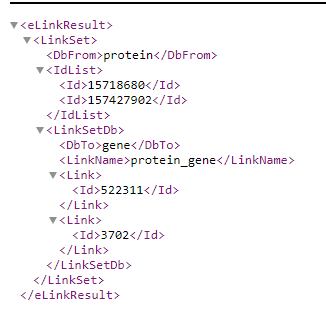

In [106]:
# from Bio import Entrez
# Entrez.email = "emarquez@lcg.unam.mx"
pmid = "15718680,157427902"
record = Entrez.read(Entrez.elink(dbfrom="protein", id=pmid,db='gene'))
print(record[0].keys())
print('The record is from the {} database.'.format(record[0]["DbFrom"]))
print('The IdList is {}.'.format(record[0]["IdList"]))

dict_keys(['ERROR', 'LinkSetDb', 'LinkSetDbHistory', 'DbFrom', 'IdList'])
The record is from the protein database.
The IdList is ['15718680', '157427902'].


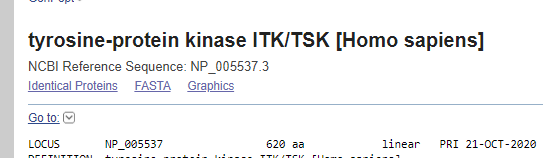

In [108]:
record[0]['LinkSetDb']

[{'Link': [{'Id': '522311'}, {'Id': '3702'}], 'DbTo': 'gene', 'LinkName': 'protein_gene'}]

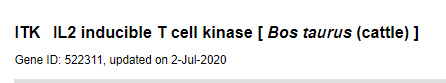

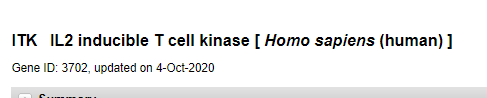

## Obtener citas

https://pubmed.ncbi.nlm.nih.gov/32703847/

In [85]:
# from Bio import Entrez
# Entrez.email = "emarquez@lcg.unam.mx"
pmid = "32703847"
results = Entrez.read(Entrez.elink(dbfrom="pubmed", db="pmc", LinkName="pubmed_pmc_refs", from_uid=pmid))
pmc_ids = [link["Id"] for link in results[0]["LinkSetDb"][0]["Link"]]
pmc_ids

results2 = Entrez.read(Entrez.elink(dbfrom="pmc", db="pubmed", LinkName="pmc_pubmed",from_uid=",".join(pmc_ids)))
pubmed_ids = [link["Id"] for link in results2[0]["LinkSetDb"][0]["Link"]]
pubmed_ids

['32850764']

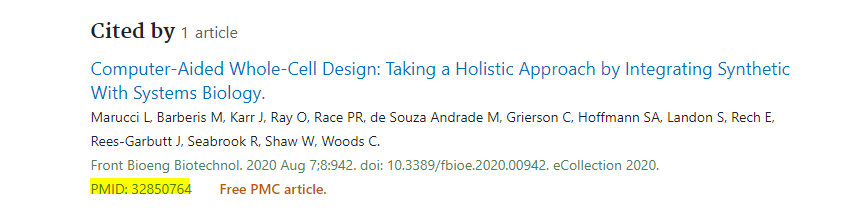